# Case study: **Quality Control**

Suppose a factory produces metal rods with length normally distributed:
- **Mean** μ (mu): 50 cm
- **Standard deviation** σ (sigma): 0.5 cm

I want to find:
- How rare or unusual is to observe a rod with a length of 51.5 cm (which might be a defect)?
- What is the probability to produce a rod with a length of 51.5 cm or longer?
- What is the probability that a randomly selected rod has a length within ±1 cm of the mean??


The quality team takes a **random sample of 25 rods** to estimate the population mean. 
The sample mean length is found to be **50.1 cm.**

- What is the standard error of the sample mean?
- What is the 95% confidence interval for the true mean rod length?

How to estimate the **true average rod length** using a **sample of 25 rods**, when the population standard deviation is **unknown**?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy.stats import t

---

## Scenario 1: Known Population Paramenters

### - **Parameters**

In [2]:
mu = 50
sigma = 0.5

### - **Z score, P(X ≤  51.5 cm)**

In [3]:
# Calculate PDF
x_val = 51.5
pdf_51_5_manual = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_val - mu) / sigma) ** 2)
pdf_51_5 = norm.pdf(x_val, mu, sigma)

In [4]:
# Making sure the pdf calculate manually is the same to the calculated with norm.pdf
assert pdf_51_5_manual == pdf_51_5

In [5]:
print(f"PDF value at length {x_val} cm: {pdf_51_5:.5f}\n {pdf_51_5:.5f} is a very low value.")

PDF value at length 51.5 cm: 0.00886
 0.00886 is a very low value.


In [6]:
# Calculate z-score
z_score = (51.5 - mu) / sigma
print(f'The z_score is: {z_score}\nWe are {z_score} standard deviation above the mean')

The z_score is: 3.0
We are 3.0 standard deviation above the mean


In [7]:
# Calculate CDF → p(x ≤ z_score) or p(x ≤ 51.5)
p_z_score_le = norm.cdf(x_val, mu, sigma)
p_z_score_le_perc = p_z_score_le * 100
p_z_score_mo = 1 - p_z_score_le
p_z_score_mo_perc = p_z_score_mo * 100

print(f"The probability that a rod is 51.5 cm or less is: {p_z_score_le_perc:.4f}%")
print(f"The probability that a rod is 51.5 cm or greater is: {p_z_score_mo_perc:.4f}%")
print(f"Rods 51.5 cm long they occur {p_z_score_mo_perc:.2f}% only of the distribution, they are quite unusual, and likely a defect.")

The probability that a rod is 51.5 cm or less is: 99.8650%
The probability that a rod is 51.5 cm or greater is: 0.1350%
Rods 51.5 cm long they occur 0.13% only of the distribution, they are quite unusual, and likely a defect.


### - **P(49 ≤ X ≤ 51)**

In [8]:
# Define CDF bounds
x_upper = 51
x_lower = 49

In [9]:
#  Calculte z-score for the bounds
z_x_upper = (x_upper - mu) / sigma
z_x_lower = (x_lower - mu) / sigma

In [10]:
# Probability within ± 1cm
p_z_x_upper = norm.cdf(z_x_upper)
p_z_x_lower = norm.cdf(z_x_lower)
p_within_1cm = p_z_x_upper - p_z_x_lower
p_within_1cm_perc = p_within_1cm * 100
print(f"The probability that a randomly selected rod has a length ± 1cm from the mean is: {p_within_1cm_perc:.2f}%")

The probability that a randomly selected rod has a length ± 1cm from the mean is: 95.45%


### - **Plot the results**

In [11]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma) # PDF

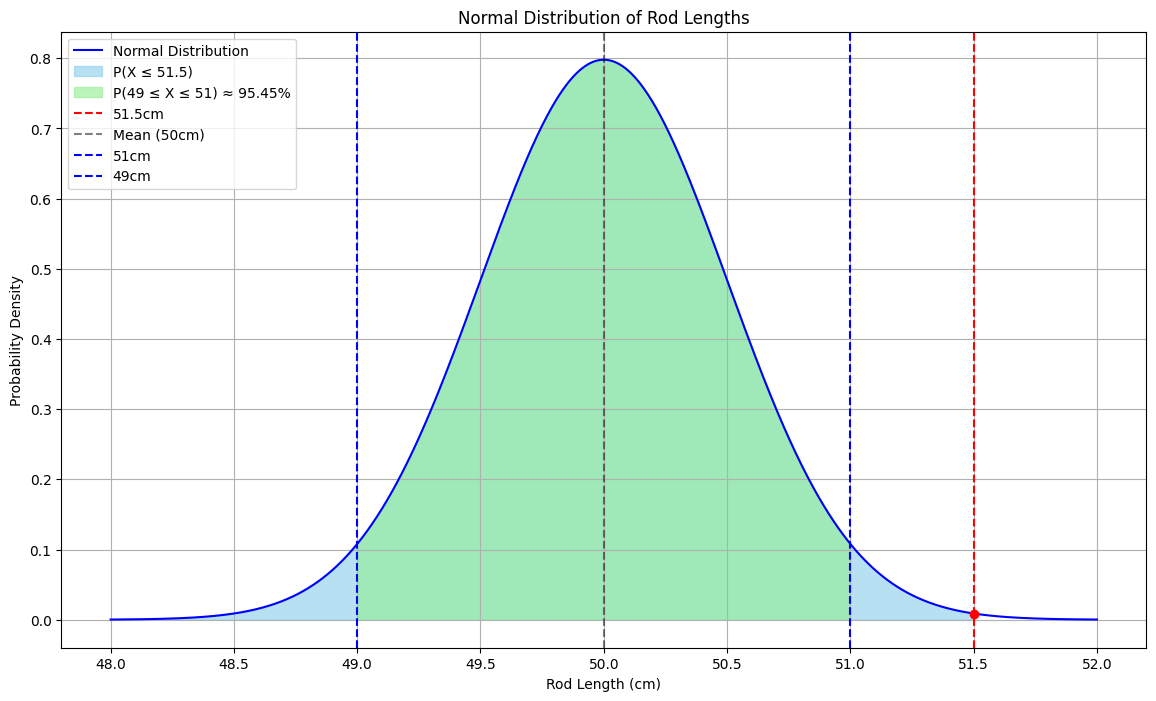

In [12]:
plt.figure(figsize=(14,8))
plt.plot(x, y, label= 'Normal Distribution', color='blue')

# Shade area for x ≤ 51.5
x_fill = np.linspace(mu - 4*sigma, x_val, 1000)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.6, label='P(X ≤ 51.5)')

# Shade area within ±1 cm (49 to 51)
x_band = np.linspace(49, 51, 1000)
y_band = norm.pdf(x_band, mu, sigma)
plt.fill_between(x_band, y_band, color='lightgreen', alpha=0.6, label=f'P(49 ≤ X ≤ 51) ≈ {p_within_1cm_perc:.2f}%')

# Mark bounds: 49cm - 50cm - 51.5cm
plt.axvline(x_val, linestyle='--', color='red', label='51.5cm')
plt.plot(x_val, pdf_51_5, 'ro')  # point on the curve
plt.axvline(mu, linestyle='--', color='black', alpha=0.5, label='Mean (50cm)')
plt.axvline(x_upper, linestyle='--', color='blue', label='51cm')
plt.axvline(x_lower, linestyle='--', color='blue', label='49cm')

# Labels 
plt.title("Normal Distribution of Rod Lengths")
plt.xlabel("Rod Length (cm)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Saving the plot
plt.savefig('normal_distribution_of_rod_lengths.png')

plt.show()

### - **95% CI (n = 25, x̄ = 50.1, z-distribution)**

In [13]:
# Given values   
n = 25              # sample size
x_bar = 50.1        # sample mean
confidence = 0.95   # confidence level
sigma = 0.5         # population standard deviation

In [14]:
# Calculate the Standard Error (SE)
SE = sigma / math.sqrt(n)
print(f'Standard Error SE: {SE} cm')

Standard Error SE: 0.1 cm


In [15]:
# Cumulative probability 
p = 0.975

In [16]:
# get the z-score where P(Z < z) = 0.975
# norm.ppf(p) returns the z-value z_star such that the area under the standard normal curve to the left of z_star is p
# For a 95% confidence interval, you use p = 0.975 (since 2.5% is left in the right tail).
z_star = norm.ppf(p)
print(f"Critical z-value for cumulative probability {p} is {z_star:.4f}")

Critical z-value for cumulative probability 0.975 is 1.9600


In [17]:
# Find the critical z-value for two-tailed test
alpha = 1 - confidence
z_star = norm.ppf(1 - alpha/2)

In [18]:
# Calculate the margin of error (ME) → How much uncertainty there is around the sample estimate (like the sample mean). 
# It’s the amount you add and subtract from your sample mean to create a confidence interval.
margin_error = z_star * SE
float(margin_error)

0.1959963984540054

In [19]:
# Calculate confidence interval
CI_lower = x_bar - margin_error
CI_upper = x_bar + margin_error

print(f"95% Confidence Interval: ({CI_lower:.3f}, {CI_upper:.3f})")
print(f'We are 95% confident that the true average rod length lies between {CI_lower:.3f} cm and {CI_upper:.3f} cm')

95% Confidence Interval: (49.904, 50.296)
We are 95% confident that the true average rod length lies between 49.904 cm and 50.296 cm


---

## Scenario 2: Unknown σ, Using Sample Data (n=25), t-distribution

In [20]:
# Parameters
x_bar = 50.1         # sample mean
s = 0.52             # sample standard deviation
n = 25               # sample size
confidence = 0.95    # confidence level
df = n - 1           # degrees of freedom

In [21]:
# Standard error
SE = s / math.sqrt(n)

In [22]:
# Critical t-value
alpha = 1 - confidence
t_star = t.ppf(1 - alpha/2, df)

In [23]:
# Margin of error and confidence interval
ME = t_star * SE
CI_lower = x_bar - ME
CI_upper = x_bar + ME

In [24]:
# Output
print(f"Sample mean: {x_bar}")
print(f"Sample standard deviation: {s}")
print(f"Standard error: {SE:.3f}")
print(f"t* critical value (df={df}): {t_star:.3f}")
print(f"Margin of Error: {ME:.3f}")
print(f"95% Confidence Interval: ({CI_lower:.3f}, {CI_upper:.3f})")
print(f"We are 95% confident that the true average of rod length lies between: {CI_lower:.3f} cm, {CI_upper:.3f} cm")


Sample mean: 50.1
Sample standard deviation: 0.52
Standard error: 0.104
t* critical value (df=24): 2.064
Margin of Error: 0.215
95% Confidence Interval: (49.885, 50.315)
We are 95% confident that the true average of rod length lies between: 49.885 cm, 50.315 cm


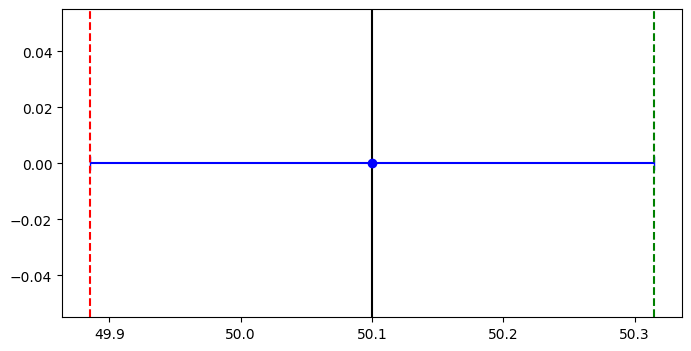

In [25]:
# Plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.errorbar(x_bar, 0, xerr=ME, fmt='o', color='blue', capsize=5, label='95% CI')
ax.axvline(CI_lower, color='red', linestyle='--', label='CI Lower Bound')
ax.axvline(CI_upper, color='green', linestyle='--', label='CI Upper Bound')
ax.axvline(x_bar, color='black', linestyle='-', label='Sample Mean')

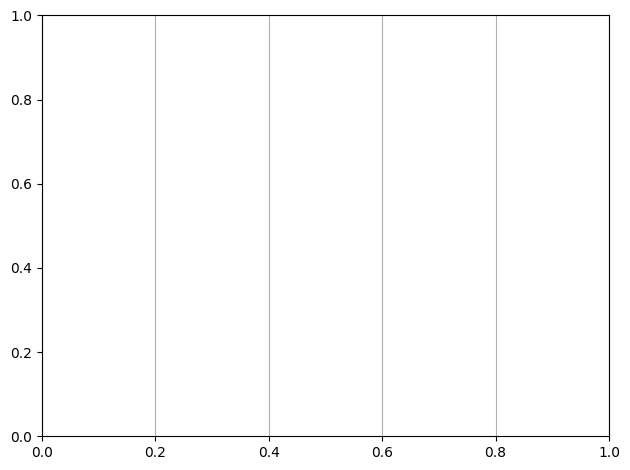

In [26]:
# Styling
ax.set_title("95% Confidence Interval for Rod Length (σ unknown, t-distribution)")
ax.set_xlabel("Rod Length (cm)")
ax.set_yticks([])
ax.set_xlim(x_bar - 4*SE, x_bar + 4*SE)
ax.legend()
plt.grid(axis='x')
plt.tight_layout()

In [27]:
# Save and show plot
plt.savefig("ci_plot_t_distribution.png")
plt.show()

<Figure size 640x480 with 0 Axes>